## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Importing Data

In [2]:
train=pd.read_csv('training_obl.csv') # train data 
test=pd.read_csv('test_obl.csv') # test data

## Enquiring Data

In [3]:
train.head() # viewing the structure of train data

,id,Area(total),Nbedrooms,Nwashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,Price
0,1,339,4,5,147,62,5,95,3,1,2996
1,2,206,7,6,133,93,1,87,6,1,19918
2,3,323,3,3,145,57,4,76,5,2,1835
3,4,357,6,2,72,96,5,68,6,5,13432
4,5,320,4,7,108,90,3,61,4,3,4584


In [4]:
test.head() # viewing the structure of test data

,id,Area(total),Nbedroom,Nwashroom,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade
0,1,218,5,1,112,68,1,74,3,4
1,2,235,6,1,112,60,4,84,3,2
2,3,269,3,1,61,57,5,82,4,1
3,4,376,2,6,98,54,5,95,1,1
4,5,353,6,3,108,83,1,64,4,1


<h3>Statistical analysis of the train and test data</h3>

In [5]:
pandas_profiling.ProfileReport(train)

Number of variables,11
Number of observations,900
Total Missing (%),0.0%
Total size in memory,77.4 KiB
Average record size in memory,88.1 B
Numeric,11
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


<h3>Result of train data (pandas profiling)</h3>

*No missing values<br>
All numeric variables and no categorical variables<br>
No outlier data points in any feature variable*

*<b>Correlation</b><br>
Nbedrooms has **high** positive correlation with the price<br>
Nwashrooms and Grade has **weak** positive correlation with the price as compared to the Nbedrooms feature*

In [6]:
pandas_profiling.ProfileReport(test)

Number of variables,10
Number of observations,250
Total Missing (%),0.0%
Total size in memory,19.6 KiB
Average record size in memory,80.3 B
Numeric,10
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


<h3>Result of test data (pandas profiling)</h3>

*No missing values<br>
No outlier data points in any feature variable*


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
id             900 non-null int64
Area(total)    900 non-null int64
Nbedrooms      900 non-null int64
Nwashrooms     900 non-null int64
Roof(Area)     900 non-null int64
Lawn(Area)     900 non-null int64
Nfloors        900 non-null int64
API            900 non-null int64
ANB            900 non-null int64
Grade          900 non-null int64
Price          900 non-null int64
dtypes: int64(11)
memory usage: 77.4 KB


<h3>Result train info</h3>

<i>All are integer values</i><br>
<i>No object types hence no need for type conversion from object type to int/float type</i>

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
id             250 non-null int64
Area(total)    250 non-null int64
Nbedroom       250 non-null int64
Nwashroom      250 non-null int64
Roof(Area)     250 non-null int64
Lawn(Area)     250 non-null int64
Nfloors        250 non-null int64
API            250 non-null int64
ANB            250 non-null int64
Grade          250 non-null int64
dtypes: int64(10)
memory usage: 19.6 KB


## Plotting price values

1.1310213066126527
0.08536703914309429


C:\Users\ashis\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


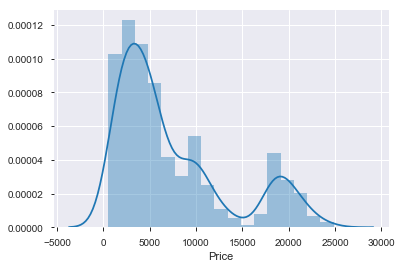

In [9]:
%matplotlib inline
sns.distplot(train.Price)
print(train.Price.skew())
print(train.Price.kurt())

<h3>Feature plotting against price</h3>

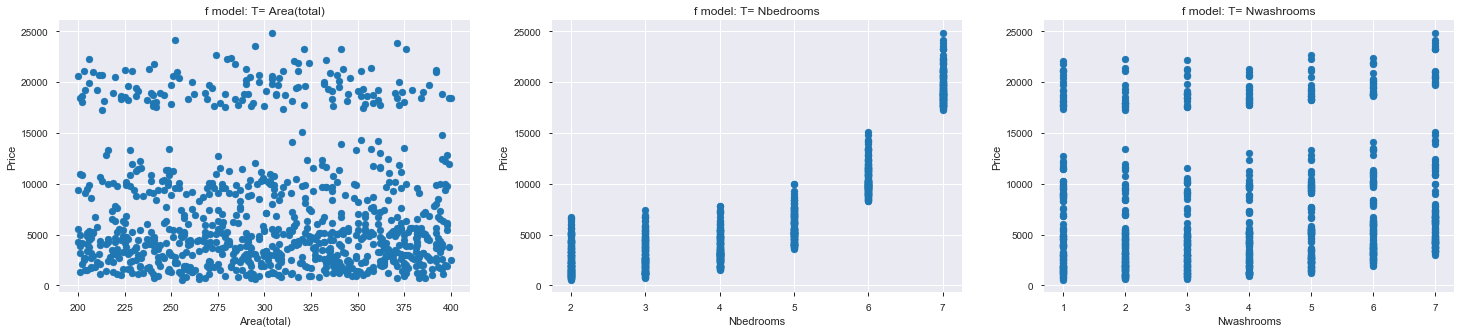

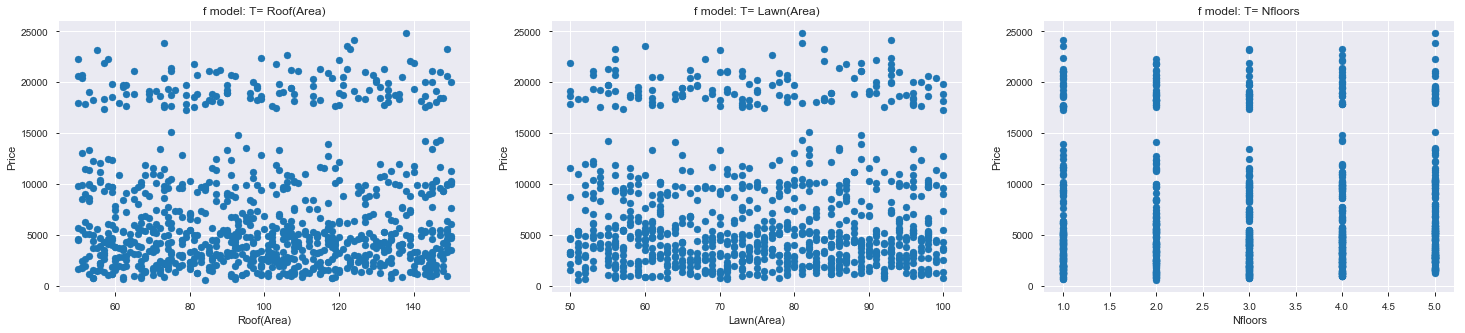

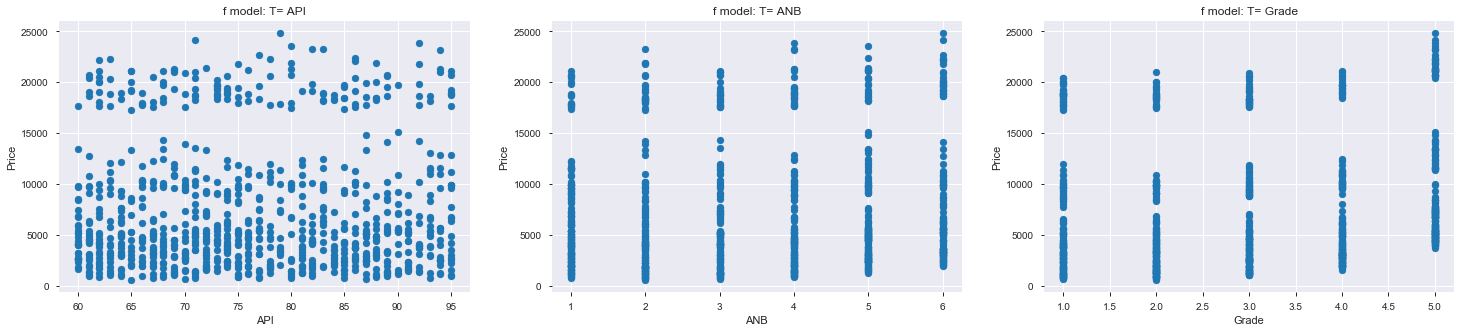

In [10]:
vars = train.columns[1:-1:]
# Not including id and price variables to plot against price

figures_per_time = 3
count = 0 
y = train.Price
for var in vars:
    x = train[var]
    plt.figure(count//figures_per_time,figsize=(25,5))
    plt.subplot(1,figures_per_time,np.mod(count,3)+1)
    plt.scatter(x, y);
    plt.ylabel('Price')
    plt.xlabel(var)
    plt.title('f model: T= {}'.format(var))
    count+=1

## Training

<h3> Error metrics </h3>

In [11]:
from sklearn.metrics import mean_squared_error
def rmse(y_actual,y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

<h3>Train Test Split</h3>

In [12]:
train.columns[1:-1:] # columns to be selected for training

Index(['Area(total)', 'Nbedrooms', 'Nwashrooms', 'Roof(Area)', 'Lawn(Area)',
       'Nfloors', 'API', 'ANB', 'Grade'],
      dtype='object')

In [13]:
y=train.Price
x=train[train.columns[1:-1:]]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42) 
# train test split where train=80% of data and test=20% of data

<h3>XGBoost</h3>

In [14]:
from xgboost import XGBRegressor

<h4>Hyperparameter Tuning</h4>

* 0.1 learning rate seemed to be overfitting and 0.01 learning rate yielded the best model amongst all variations

* No need to normalize in XGBoost model

* Tried different max_depth values from 3 to 20 and found 3 to be optimal value

* n_estimators=2000 seemed optimal according to the small dataset

* Changing colsample_bylevel, reg_alpha and reg_lambda did not have any significant affect on our model hence stuck to the default values

In [15]:
model = XGBRegressor(              
                 learning_rate=0.01,
                 max_depth=3,
                 n_estimators=2000
)

In [16]:
eval_set = [(X_train, y_train), (X_test, y_test)]

In [17]:
model.fit(X_train,y_train,verbose=True,eval_set=eval_set)

[0]	validation_0-rmse:9450.88	validation_1-rmse:9646.34
[1]	validation_0-rmse:9359.64	validation_1-rmse:9553.27
[2]	validation_0-rmse:9269.32	validation_1-rmse:9460.55
[3]	validation_0-rmse:9179.9	validation_1-rmse:9369.35
[4]	validation_0-rmse:9091.38	validation_1-rmse:9278.48
[5]	validation_0-rmse:9003.75	validation_1-rmse:9189.11
[6]	validation_0-rmse:8917	validation_1-rmse:9100.05
[7]	validation_0-rmse:8831.13	validation_1-rmse:9012.47
[8]	validation_0-rmse:8746.11	validation_1-rmse:8925.19
[9]	validation_0-rmse:8661.96	validation_1-rmse:8839.36
[10]	validation_0-rmse:8578.65	validation_1-rmse:8753.83
[11]	validation_0-rmse:8496.18	validation_1-rmse:8669.73
[12]	validation_0-rmse:8414.54	validation_1-rmse:8585.9
[13]	validation_0-rmse:8333.72	validation_1-rmse:8503.49
[14]	validation_0-rmse:8253.72	validation_1-rmse:8421.34
[15]	validation_0-rmse:8174.52	validation_1-rmse:8340.59
[16]	validation_0-rmse:8096.13	validation_1-rmse:8260.08
[17]	validation_0-rmse:8018.52	validation_1-rm

[144]	validation_0-rmse:2457.41	validation_1-rmse:2484.23
[145]	validation_0-rmse:2436	validation_1-rmse:2462.56
[146]	validation_0-rmse:2414.77	validation_1-rmse:2441.15
[147]	validation_0-rmse:2393.77	validation_1-rmse:2420.12
[148]	validation_0-rmse:2372.97	validation_1-rmse:2398.93
[149]	validation_0-rmse:2352.42	validation_1-rmse:2377.96
[150]	validation_0-rmse:2332.06	validation_1-rmse:2357.85
[151]	validation_0-rmse:2311.9	validation_1-rmse:2337.34
[152]	validation_0-rmse:2291.95	validation_1-rmse:2317.91
[153]	validation_0-rmse:2272.22	validation_1-rmse:2297.49
[154]	validation_0-rmse:2252.66	validation_1-rmse:2277.92
[155]	validation_0-rmse:2233.32	validation_1-rmse:2258.89
[156]	validation_0-rmse:2214.19	validation_1-rmse:2239.41
[157]	validation_0-rmse:2195.23	validation_1-rmse:2220.45
[158]	validation_0-rmse:2176.47	validation_1-rmse:2201.57
[159]	validation_0-rmse:2157.92	validation_1-rmse:2182.8
[160]	validation_0-rmse:2139.52	validation_1-rmse:2163.78
[161]	validation_0-

[286]	validation_0-rmse:837.289	validation_1-rmse:870.578
[287]	validation_0-rmse:832.182	validation_1-rmse:865.865
[288]	validation_0-rmse:827.101	validation_1-rmse:860.648
[289]	validation_0-rmse:822.098	validation_1-rmse:855.994
[290]	validation_0-rmse:817.103	validation_1-rmse:850.976
[291]	validation_0-rmse:812.146	validation_1-rmse:846.291
[292]	validation_0-rmse:807.268	validation_1-rmse:841.482
[293]	validation_0-rmse:802.419	validation_1-rmse:836.38
[294]	validation_0-rmse:797.602	validation_1-rmse:832.126
[295]	validation_0-rmse:792.867	validation_1-rmse:827.729
[296]	validation_0-rmse:788.169	validation_1-rmse:823.089
[297]	validation_0-rmse:783.488	validation_1-rmse:818.177
[298]	validation_0-rmse:778.888	validation_1-rmse:813.912
[299]	validation_0-rmse:774.304	validation_1-rmse:809.204
[300]	validation_0-rmse:769.739	validation_1-rmse:804.942
[301]	validation_0-rmse:765.225	validation_1-rmse:800.317
[302]	validation_0-rmse:760.757	validation_1-rmse:796.241
[303]	validatio

[428]	validation_0-rmse:406.906	validation_1-rmse:449.086
[429]	validation_0-rmse:405.152	validation_1-rmse:447.288
[430]	validation_0-rmse:403.372	validation_1-rmse:445.562
[431]	validation_0-rmse:401.623	validation_1-rmse:443.941
[432]	validation_0-rmse:399.966	validation_1-rmse:442.278
[433]	validation_0-rmse:398.262	validation_1-rmse:440.531
[434]	validation_0-rmse:396.606	validation_1-rmse:438.998
[435]	validation_0-rmse:394.958	validation_1-rmse:437.468
[436]	validation_0-rmse:393.245	validation_1-rmse:435.806
[437]	validation_0-rmse:391.575	validation_1-rmse:434.274
[438]	validation_0-rmse:389.917	validation_1-rmse:432.575
[439]	validation_0-rmse:388.331	validation_1-rmse:430.989
[440]	validation_0-rmse:386.607	validation_1-rmse:429.307
[441]	validation_0-rmse:384.978	validation_1-rmse:427.764
[442]	validation_0-rmse:383.361	validation_1-rmse:426.106
[443]	validation_0-rmse:381.8	validation_1-rmse:424.731
[444]	validation_0-rmse:380.259	validation_1-rmse:423.185
[445]	validation

[570]	validation_0-rmse:236.733	validation_1-rmse:278.168
[571]	validation_0-rmse:235.913	validation_1-rmse:277.281
[572]	validation_0-rmse:235.159	validation_1-rmse:276.504
[573]	validation_0-rmse:234.346	validation_1-rmse:275.682
[574]	validation_0-rmse:233.565	validation_1-rmse:274.826
[575]	validation_0-rmse:232.82	validation_1-rmse:274.166
[576]	validation_0-rmse:232.004	validation_1-rmse:273.399
[577]	validation_0-rmse:231.219	validation_1-rmse:272.56
[578]	validation_0-rmse:230.462	validation_1-rmse:271.738
[579]	validation_0-rmse:229.678	validation_1-rmse:270.946
[580]	validation_0-rmse:228.915	validation_1-rmse:270.24
[581]	validation_0-rmse:228.133	validation_1-rmse:269.424
[582]	validation_0-rmse:227.397	validation_1-rmse:268.672
[583]	validation_0-rmse:226.651	validation_1-rmse:267.982
[584]	validation_0-rmse:225.879	validation_1-rmse:267.144
[585]	validation_0-rmse:225.129	validation_1-rmse:266.37
[586]	validation_0-rmse:224.371	validation_1-rmse:265.606
[587]	validation_0

[712]	validation_0-rmse:155.008	validation_1-rmse:194.447
[713]	validation_0-rmse:154.615	validation_1-rmse:194.045
[714]	validation_0-rmse:154.241	validation_1-rmse:193.705
[715]	validation_0-rmse:153.85	validation_1-rmse:193.333
[716]	validation_0-rmse:153.456	validation_1-rmse:192.974
[717]	validation_0-rmse:153.072	validation_1-rmse:192.581
[718]	validation_0-rmse:152.658	validation_1-rmse:192.104
[719]	validation_0-rmse:152.273	validation_1-rmse:191.735
[720]	validation_0-rmse:151.887	validation_1-rmse:191.21
[721]	validation_0-rmse:151.505	validation_1-rmse:190.86
[722]	validation_0-rmse:151.1	validation_1-rmse:190.41
[723]	validation_0-rmse:150.721	validation_1-rmse:190.024
[724]	validation_0-rmse:150.344	validation_1-rmse:189.665
[725]	validation_0-rmse:149.946	validation_1-rmse:189.288
[726]	validation_0-rmse:149.58	validation_1-rmse:188.86
[727]	validation_0-rmse:149.176	validation_1-rmse:188.504
[728]	validation_0-rmse:148.79	validation_1-rmse:188.098
[729]	validation_0-rmse

[854]	validation_0-rmse:112.259	validation_1-rmse:151.732
[855]	validation_0-rmse:112.052	validation_1-rmse:151.561
[856]	validation_0-rmse:111.822	validation_1-rmse:151.335
[857]	validation_0-rmse:111.605	validation_1-rmse:151.078
[858]	validation_0-rmse:111.387	validation_1-rmse:150.906
[859]	validation_0-rmse:111.181	validation_1-rmse:150.693
[860]	validation_0-rmse:110.966	validation_1-rmse:150.438
[861]	validation_0-rmse:110.748	validation_1-rmse:150.138
[862]	validation_0-rmse:110.536	validation_1-rmse:149.962
[863]	validation_0-rmse:110.333	validation_1-rmse:149.738
[864]	validation_0-rmse:110.137	validation_1-rmse:149.514
[865]	validation_0-rmse:109.927	validation_1-rmse:149.272
[866]	validation_0-rmse:109.711	validation_1-rmse:149.014
[867]	validation_0-rmse:109.504	validation_1-rmse:148.85
[868]	validation_0-rmse:109.295	validation_1-rmse:148.659
[869]	validation_0-rmse:109.087	validation_1-rmse:148.495
[870]	validation_0-rmse:108.893	validation_1-rmse:148.332
[871]	validatio

[996]	validation_0-rmse:88.6669	validation_1-rmse:127.642
[997]	validation_0-rmse:88.5555	validation_1-rmse:127.479
[998]	validation_0-rmse:88.4155	validation_1-rmse:127.359
[999]	validation_0-rmse:88.2953	validation_1-rmse:127.262
[1000]	validation_0-rmse:88.1683	validation_1-rmse:127.12
[1001]	validation_0-rmse:88.0426	validation_1-rmse:126.948
[1002]	validation_0-rmse:87.929	validation_1-rmse:126.854
[1003]	validation_0-rmse:87.8181	validation_1-rmse:126.742
[1004]	validation_0-rmse:87.6889	validation_1-rmse:126.603
[1005]	validation_0-rmse:87.5726	validation_1-rmse:126.505
[1006]	validation_0-rmse:87.4587	validation_1-rmse:126.364
[1007]	validation_0-rmse:87.3364	validation_1-rmse:126.247
[1008]	validation_0-rmse:87.2231	validation_1-rmse:126.133
[1009]	validation_0-rmse:87.1173	validation_1-rmse:126.009
[1010]	validation_0-rmse:86.9843	validation_1-rmse:125.896
[1011]	validation_0-rmse:86.8594	validation_1-rmse:125.759
[1012]	validation_0-rmse:86.7385	validation_1-rmse:125.623
[10

[1136]	validation_0-rmse:75.3918	validation_1-rmse:114.072
[1137]	validation_0-rmse:75.325	validation_1-rmse:114.002
[1138]	validation_0-rmse:75.2577	validation_1-rmse:113.937
[1139]	validation_0-rmse:75.1887	validation_1-rmse:113.884
[1140]	validation_0-rmse:75.12	validation_1-rmse:113.818
[1141]	validation_0-rmse:75.0518	validation_1-rmse:113.748
[1142]	validation_0-rmse:74.9864	validation_1-rmse:113.701
[1143]	validation_0-rmse:74.9121	validation_1-rmse:113.585
[1144]	validation_0-rmse:74.8445	validation_1-rmse:113.533
[1145]	validation_0-rmse:74.7778	validation_1-rmse:113.494
[1146]	validation_0-rmse:74.7131	validation_1-rmse:113.424
[1147]	validation_0-rmse:74.6407	validation_1-rmse:113.33
[1148]	validation_0-rmse:74.5759	validation_1-rmse:113.271
[1149]	validation_0-rmse:74.5122	validation_1-rmse:113.196
[1150]	validation_0-rmse:74.4405	validation_1-rmse:113.104
[1151]	validation_0-rmse:74.3771	validation_1-rmse:113.053
[1152]	validation_0-rmse:74.3121	validation_1-rmse:112.994
[

[1276]	validation_0-rmse:67.1668	validation_1-rmse:106.129
[1277]	validation_0-rmse:67.1068	validation_1-rmse:106.048
[1278]	validation_0-rmse:67.0611	validation_1-rmse:106.013
[1279]	validation_0-rmse:67.0229	validation_1-rmse:105.992
[1280]	validation_0-rmse:66.9705	validation_1-rmse:105.938
[1281]	validation_0-rmse:66.9268	validation_1-rmse:105.877
[1282]	validation_0-rmse:66.8796	validation_1-rmse:105.855
[1283]	validation_0-rmse:66.8374	validation_1-rmse:105.829
[1284]	validation_0-rmse:66.7929	validation_1-rmse:105.793
[1285]	validation_0-rmse:66.755	validation_1-rmse:105.759
[1286]	validation_0-rmse:66.7116	validation_1-rmse:105.717
[1287]	validation_0-rmse:66.6721	validation_1-rmse:105.686
[1288]	validation_0-rmse:66.6289	validation_1-rmse:105.644
[1289]	validation_0-rmse:66.5854	validation_1-rmse:105.603
[1290]	validation_0-rmse:66.5485	validation_1-rmse:105.57
[1291]	validation_0-rmse:66.497	validation_1-rmse:105.529
[1292]	validation_0-rmse:66.4536	validation_1-rmse:105.475


[1416]	validation_0-rmse:61.8198	validation_1-rmse:101.535
[1417]	validation_0-rmse:61.7912	validation_1-rmse:101.502
[1418]	validation_0-rmse:61.765	validation_1-rmse:101.49
[1419]	validation_0-rmse:61.7299	validation_1-rmse:101.486
[1420]	validation_0-rmse:61.6947	validation_1-rmse:101.43
[1421]	validation_0-rmse:61.6545	validation_1-rmse:101.379
[1422]	validation_0-rmse:61.6225	validation_1-rmse:101.341
[1423]	validation_0-rmse:61.5996	validation_1-rmse:101.328
[1424]	validation_0-rmse:61.5676	validation_1-rmse:101.313
[1425]	validation_0-rmse:61.5397	validation_1-rmse:101.285
[1426]	validation_0-rmse:61.5084	validation_1-rmse:101.237
[1427]	validation_0-rmse:61.4845	validation_1-rmse:101.215
[1428]	validation_0-rmse:61.4567	validation_1-rmse:101.214
[1429]	validation_0-rmse:61.4225	validation_1-rmse:101.21
[1430]	validation_0-rmse:61.3912	validation_1-rmse:101.177
[1431]	validation_0-rmse:61.3487	validation_1-rmse:101.126
[1432]	validation_0-rmse:61.3215	validation_1-rmse:101.095
[

[1556]	validation_0-rmse:58.123	validation_1-rmse:98.2828
[1557]	validation_0-rmse:58.0981	validation_1-rmse:98.2749
[1558]	validation_0-rmse:58.0783	validation_1-rmse:98.2752
[1559]	validation_0-rmse:58.051	validation_1-rmse:98.2341
[1560]	validation_0-rmse:58.0228	validation_1-rmse:98.1876
[1561]	validation_0-rmse:58.0066	validation_1-rmse:98.1742
[1562]	validation_0-rmse:57.9849	validation_1-rmse:98.1549
[1563]	validation_0-rmse:57.9604	validation_1-rmse:98.1508
[1564]	validation_0-rmse:57.9416	validation_1-rmse:98.1229
[1565]	validation_0-rmse:57.9174	validation_1-rmse:98.0872
[1566]	validation_0-rmse:57.8948	validation_1-rmse:98.0744
[1567]	validation_0-rmse:57.8794	validation_1-rmse:98.0545
[1568]	validation_0-rmse:57.8553	validation_1-rmse:98.05
[1569]	validation_0-rmse:57.8345	validation_1-rmse:98.0526
[1570]	validation_0-rmse:57.8187	validation_1-rmse:98.0395
[1571]	validation_0-rmse:57.7902	validation_1-rmse:98.0008
[1572]	validation_0-rmse:57.7627	validation_1-rmse:97.9554
[

[1696]	validation_0-rmse:55.3889	validation_1-rmse:95.8922
[1697]	validation_0-rmse:55.3716	validation_1-rmse:95.8675
[1698]	validation_0-rmse:55.3599	validation_1-rmse:95.861
[1699]	validation_0-rmse:55.3417	validation_1-rmse:95.8607
[1700]	validation_0-rmse:55.3195	validation_1-rmse:95.8352
[1701]	validation_0-rmse:55.3024	validation_1-rmse:95.8319
[1702]	validation_0-rmse:55.2863	validation_1-rmse:95.8153
[1703]	validation_0-rmse:55.2688	validation_1-rmse:95.7875
[1704]	validation_0-rmse:55.2538	validation_1-rmse:95.7713
[1705]	validation_0-rmse:55.2369	validation_1-rmse:95.7569
[1706]	validation_0-rmse:55.2196	validation_1-rmse:95.7425
[1707]	validation_0-rmse:55.2019	validation_1-rmse:95.7424
[1708]	validation_0-rmse:55.1852	validation_1-rmse:95.7206
[1709]	validation_0-rmse:55.1738	validation_1-rmse:95.7109
[1710]	validation_0-rmse:55.159	validation_1-rmse:95.6938
[1711]	validation_0-rmse:55.1442	validation_1-rmse:95.6803
[1712]	validation_0-rmse:55.1284	validation_1-rmse:95.6656

[1836]	validation_0-rmse:53.2508	validation_1-rmse:94.2803
[1837]	validation_0-rmse:53.232	validation_1-rmse:94.2546
[1838]	validation_0-rmse:53.2206	validation_1-rmse:94.2486
[1839]	validation_0-rmse:53.206	validation_1-rmse:94.2458
[1840]	validation_0-rmse:53.19	validation_1-rmse:94.2391
[1841]	validation_0-rmse:53.1765	validation_1-rmse:94.2239
[1842]	validation_0-rmse:53.156	validation_1-rmse:94.2149
[1843]	validation_0-rmse:53.1448	validation_1-rmse:94.2062
[1844]	validation_0-rmse:53.1325	validation_1-rmse:94.2064
[1845]	validation_0-rmse:53.116	validation_1-rmse:94.1911
[1846]	validation_0-rmse:53.1025	validation_1-rmse:94.1937
[1847]	validation_0-rmse:53.0872	validation_1-rmse:94.1909
[1848]	validation_0-rmse:53.076	validation_1-rmse:94.1807
[1849]	validation_0-rmse:53.0674	validation_1-rmse:94.1758
[1850]	validation_0-rmse:53.0541	validation_1-rmse:94.1559
[1851]	validation_0-rmse:53.0369	validation_1-rmse:94.1473
[1852]	validation_0-rmse:53.0236	validation_1-rmse:94.1489
[185

[1976]	validation_0-rmse:51.215	validation_1-rmse:92.7619
[1977]	validation_0-rmse:51.208	validation_1-rmse:92.7588
[1978]	validation_0-rmse:51.1805	validation_1-rmse:92.7274
[1979]	validation_0-rmse:51.1626	validation_1-rmse:92.7182
[1980]	validation_0-rmse:51.1506	validation_1-rmse:92.7005
[1981]	validation_0-rmse:51.1412	validation_1-rmse:92.6948
[1982]	validation_0-rmse:51.1292	validation_1-rmse:92.6897
[1983]	validation_0-rmse:51.1177	validation_1-rmse:92.6905
[1984]	validation_0-rmse:51.1052	validation_1-rmse:92.6832
[1985]	validation_0-rmse:51.0781	validation_1-rmse:92.6449
[1986]	validation_0-rmse:51.0667	validation_1-rmse:92.6519
[1987]	validation_0-rmse:51.0549	validation_1-rmse:92.6344
[1988]	validation_0-rmse:51.0441	validation_1-rmse:92.6194
[1989]	validation_0-rmse:51.0272	validation_1-rmse:92.6125
[1990]	validation_0-rmse:51.0116	validation_1-rmse:92.5881
[1991]	validation_0-rmse:50.9965	validation_1-rmse:92.5987
[1992]	validation_0-rmse:50.9729	validation_1-rmse:92.5833

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [18]:
predictions=model.predict(X_test) # predicting on test split

In [19]:
print("Accuracy(rmse)=",rmse(y_test,predictions)) # rmse error on test split

Accuracy(rmse)= 92.47183127017728


<h3>Accuracy Plot</h3>

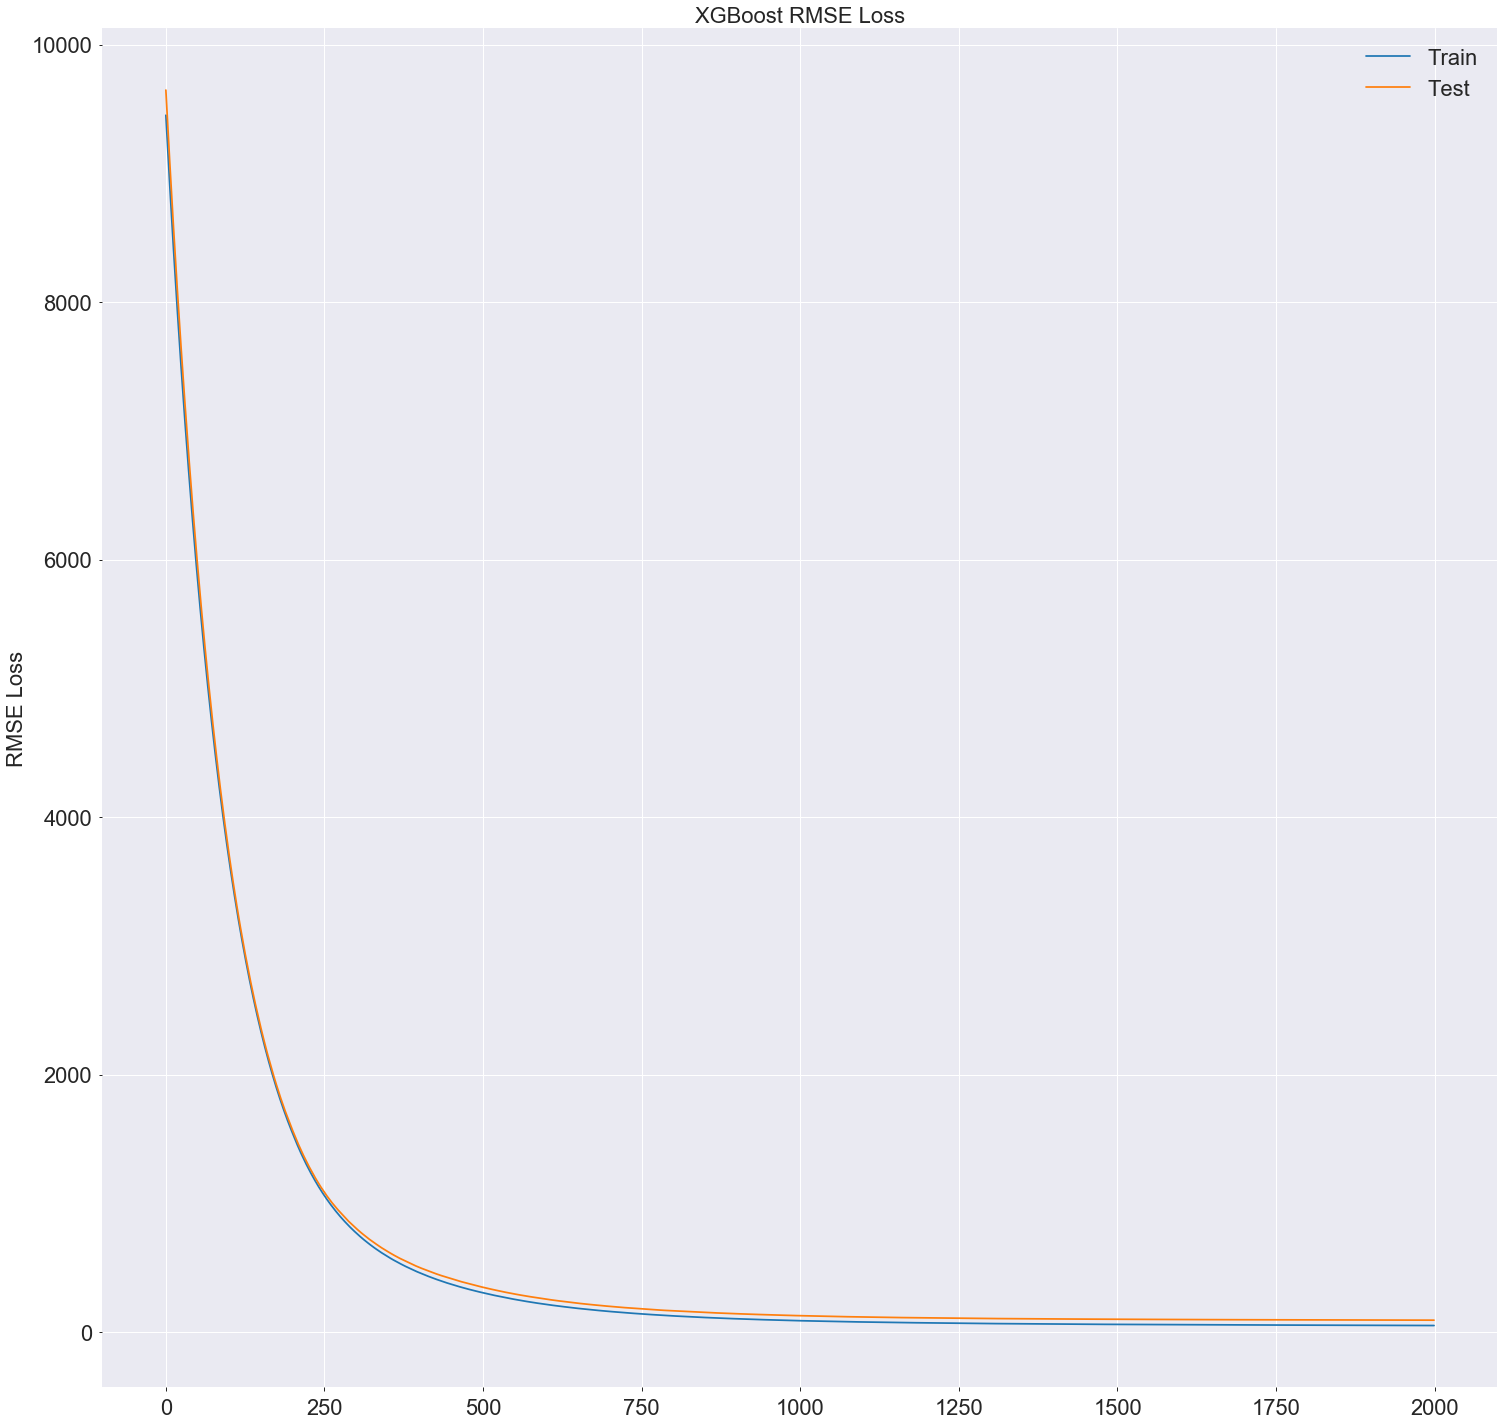

In [20]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
# plot RMSE loss
fig, ax = plt.subplots(figsize=(25,25))
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend(fontsize=22)
plt.ylabel('RMSE Loss',fontsize=22)
plt.title('XGBoost RMSE Loss',fontsize=22)
plt.show()


## Test data predictions

In [21]:
pd.read_csv('sample.csv').head() # viewing the structure of sample data

,id,Price
0,1,122
1,2,149
2,3,194
3,4,185
4,5,198


In [22]:
train.columns

Index(['id', 'Area(total)', 'Nbedrooms', 'Nwashrooms', 'Roof(Area)',
       'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'Grade', 'Price'],
      dtype='object')

In [23]:
test.columns

Index(['id', 'Area(total)', 'Nbedroom', 'Nwashroom', 'Roof(Area)',
       'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'Grade'],
      dtype='object')

*Since train and test data have different column names hence we need to rename the test columns*

In [24]:
test=test.rename(columns={"Nbedroom":"Nbedrooms","Nwashroom":"Nwashrooms"})

In [25]:
test_data=test[test.columns[1::]] # selecting the test features

In [26]:
ans=model.predict(test_data) # predicted values

In [27]:
df=pd.DataFrame({"id":test.id,"Price":ans}) # Final dataframe

In [28]:
 df.to_csv('null_shredders_solution.csv',index=False) # Exporting final dataframe to csv